### Description

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import f1_score
import time

In [4]:
## for readability, we import all used packages at the begining 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree
import graphviz

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV

import time

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingRegressor


import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import brier_score_loss

from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import CalibrationDisplay

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn import tree
from sklearn.tree import plot_tree
import graphviz


## Part 1: Decision Trees

**1.1: Load the provided dataset**

In [5]:
df = pd.read_csv('Project2_dataset.csv')

**1.2: Plot % of missing values in each column. consider dropping any columns? consider imputing the missing values?**

Count total NaN at each column in a DataFrame : 

 RowNumber            0
CustomerId           0
Surname              0
CreditScore        441
Geography            0
Gender               0
Age                  0
Tenure               0
Balance            123
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary    800
Exited               0
dtype: int64


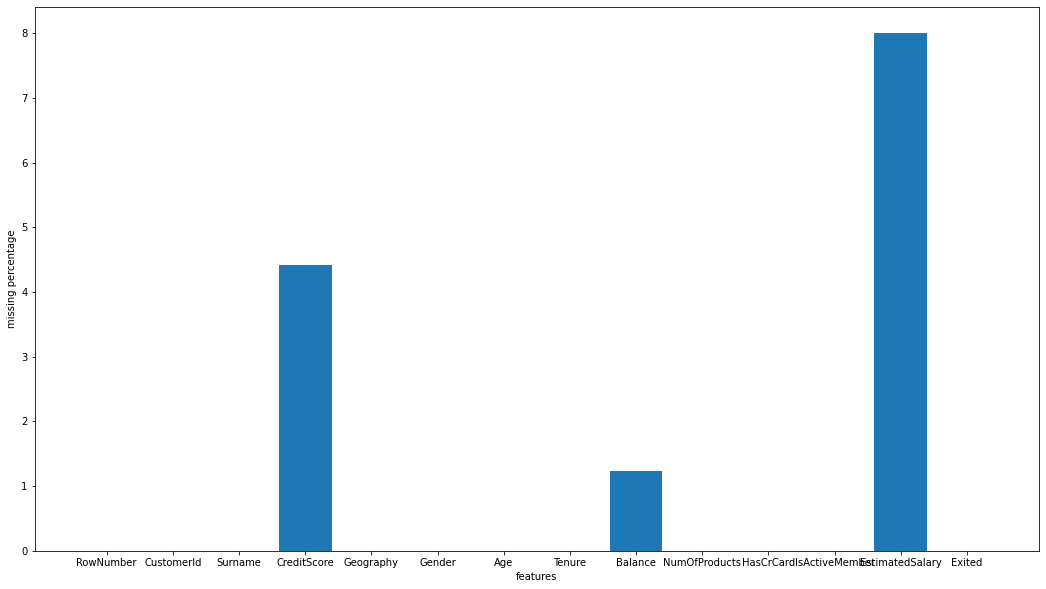

In [6]:
missing = df.isna().sum()
length = len(df)
perc = missing/length * 100
plt.figure(figsize=(18,10))
plt.bar(df.columns,perc)
plt.ylabel('missing percentage')
plt.xlabel('features')
print("Count total NaN at each column in a DataFrame : \n\n", missing)

In [9]:
df_new = df.dropna()
df_new = df_new.drop(columns = ['Surname','RowNumber','CustomerId'])

##### We drop the null values from the dataset first. Then the column 'Surname','RowNumber','CustomerId','EstimatedSalary' should be droped because they contribute no meaningful information to the target feature. We do not imput these features because they may cause problem in our model training and make the model unbalanced. 

**1.3: Plot side-by-side bars of class distribtuion for each category for the categorical feature and the target categories.**

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

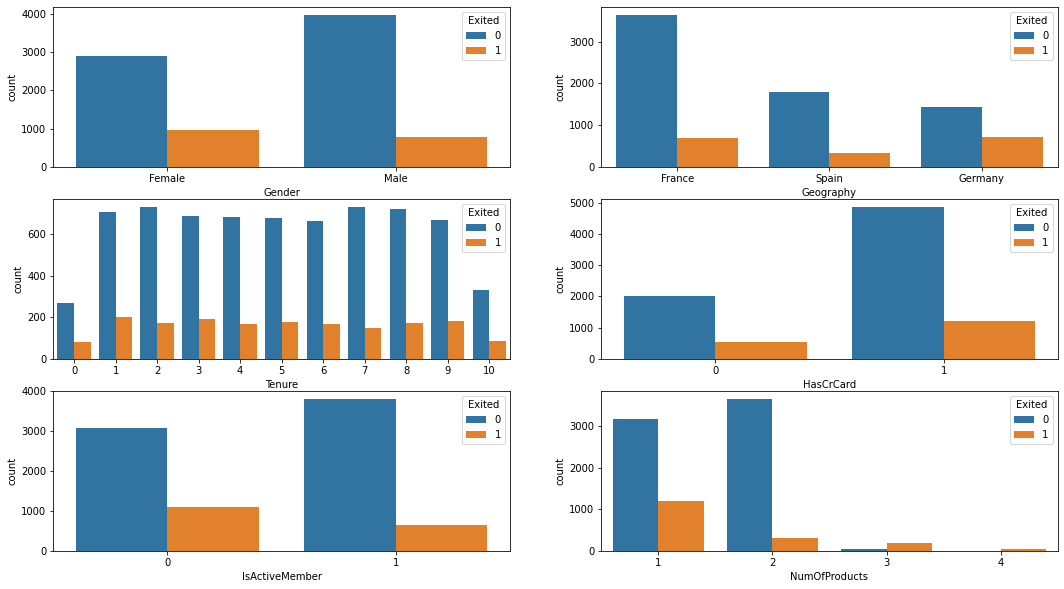

In [8]:
fig, ax = plt.subplots(3,2,figsize=(18, 10));

sns.countplot(x=df_new["Geography"],hue = df_new['Exited'],ax=ax[0,1])
sns.countplot(x=df_new["Gender"],hue = df_new['Exited'],ax=ax[0,0])
sns.countplot(x=df_new["Tenure"],hue = df_new['Exited'],ax=ax[1,0])
sns.countplot(x=df_new["HasCrCard"],hue = df_new['Exited'],ax=ax[1,1])
sns.countplot(x=df_new["IsActiveMember"],hue = df_new['Exited'],ax=ax[2,0])
sns.countplot(x=df_new["NumOfProducts"],hue = df_new['Exited'],ax=ax[2,1])

**1.4: Split the data into development and test datasets.**

In [10]:
## YOUR CODE HERE
df_X = df_new.drop(columns = ['Exited'],axis = 1)
df_y = df_new['Exited'] 

# Split the dataset into training (60%), validation (20%), and test (20%) sets
X_dev, X_test, y_dev, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=0.25, random_state=0)


#### Here we will split the data into training and test sets, with an 80-20 random split. Random split the sample preserves the ratio of the train to test examples. Since we randomly assign data into test and development set, we decrease the probability of getting biased toward any specific feature in the training process.

**1.5: Preprocess the data (the Categorical Variable). apply scaling?**

In [11]:
## for train set
X_train = pd.get_dummies(X_train,dummy_na= False) ## after this, we still have to hande "Tenure" and "NumOfProducts"

X_train_nop = pd.get_dummies(X_train['NumOfProducts'],prefix = 'NOP')
X_train_tenure = pd.get_dummies(X_train['Tenure'],prefix = 'Tenure_len')

X_train_temp = pd.concat([X_train, X_train_nop, X_train_tenure],axis = 1) ## Concatenated horizontally 
X_train_temp = X_train_temp.drop(columns = ['Tenure','NumOfProducts'])
X_train = X_train_temp
list(X_train.columns)

## do the same for validation set
X_val = pd.get_dummies(X_val,dummy_na= False) ## after this, we still have to hande "Tenure" and "NumOfProducts"

X_val_nop = pd.get_dummies(X_val['NumOfProducts'],prefix = 'NOP')
X_val_tenure = pd.get_dummies(X_val['Tenure'],prefix = 'Tenure_len')

X_val_temp = pd.concat([X_val, X_val_nop, X_val_tenure],axis = 1)
X_val_temp = X_val_temp.drop(columns = ['Tenure','NumOfProducts'])
X_val = X_val_temp


# do the same for test set
X_test = pd.get_dummies(X_test,dummy_na= False) ## after this, we still have to hande "Tenure" and "NumOfProducts"

X_test_nop = pd.get_dummies(X_test['NumOfProducts'],prefix = 'NOP')
X_test_tenure = pd.get_dummies(X_test['Tenure'],prefix = 'Tenure_len')

X_test_temp = pd.concat([X_test, X_test_nop, X_test_tenure],axis = 1)
X_test_temp = X_test_temp.drop(columns = ['Tenure','NumOfProducts'])
X_test = X_test_temp


print(list(X_train.columns))
print(list(X_val.columns))
print(list(X_test.columns))


['CreditScore', 'Age', 'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male', 'NOP_1', 'NOP_2', 'NOP_3', 'NOP_4', 'Tenure_len_0', 'Tenure_len_1', 'Tenure_len_2', 'Tenure_len_3', 'Tenure_len_4', 'Tenure_len_5', 'Tenure_len_6', 'Tenure_len_7', 'Tenure_len_8', 'Tenure_len_9', 'Tenure_len_10']
['CreditScore', 'Age', 'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male', 'NOP_1', 'NOP_2', 'NOP_3', 'NOP_4', 'Tenure_len_0', 'Tenure_len_1', 'Tenure_len_2', 'Tenure_len_3', 'Tenure_len_4', 'Tenure_len_5', 'Tenure_len_6', 'Tenure_len_7', 'Tenure_len_8', 'Tenure_len_9', 'Tenure_len_10']
['CreditScore', 'Age', 'Balance', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male', 'NOP_1', 'NOP_2', 'NOP_3', 'NOP_4', 'Tenure_le

#### Here we do not need to apply scalling to data because we already encoded categorical data with 0 and 1 (and probably 2 or 3 depending on how many categories there are). Also, decision trees are usually not sensitive to variance, so it's not necessary to scale the numerical data as well. 

**1.6: Fit a Decision Tree on the development data until all leaves are pure. Analyze the performance of the tree on the development set and test set? **

In [14]:
clf = DecisionTreeClassifier(criterion = 'entropy')
clf = clf.fit(X_train,y_train)

y_pred_train = clf.predict(X_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_score_train = f1_score(y_train,y_pred_train)
print("Accuracy on development set(train):",metrics.accuracy_score(y_train, y_pred_train))
print('precision score on development set(train):', precision_train)
print('recall score on development set(train):', recall_train)
print('f1 score on development set(train):', f1_score_train, '\n')

y_pred_val = clf.predict(X_val)
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1_score_val = f1_score(y_val,y_pred_val)
print("Accuracy on development set(validation):",metrics.accuracy_score(y_val, y_pred_val))
print('precision score on development set(validation):', precision_val)
print('recall score on development set(validation):', recall_val)
print('f1 score on development set(validation):', f1_score_val, '\n')

y_pred_test = clf.predict(X_test)
precision_test =  precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test,y_pred_test)
print("Accuracy on test set:",metrics.accuracy_score(y_test, y_pred_test))
print('precision score on test set:', precision_test)
print('recall score on test set:', recall_test)
print('f1 score on test set:', f1_score_test)
print('max_depth of the tree:', clf.tree_.max_depth)

Accuracy on development set(train): 1.0
precision score on development set(train): 1.0
recall score on development set(train): 1.0
f1 score on development set(train): 1.0 

Accuracy on development set(validation): 0.7788071800810654
precision score on development set(validation): 0.4576271186440678
recall score on development set(validation): 0.4602272727272727
f1 score on development set(validation): 0.45892351274787535 

Accuracy on test set: 0.8026620370370371
precision score on test set: 0.5
recall score on test set: 0.5073313782991202
f1 score on test set: 0.5036390101892285
max_depth of the tree: 27


#### We reported the accuracy, precision, recall, and f1 score on both development and test set. We want to first take a look at the accuracy of the model. Then we want to use precision to measure how presice our model is, ie.  out of those predicted positive, how many of them are actually positive. Then the recall socres tell us how many of the actual positives our model captures by labeling it as positive. F-1 scores seek a balance betwee presition and recall score. 

**1.7: Visualize the trained tree until the max_depth 8**

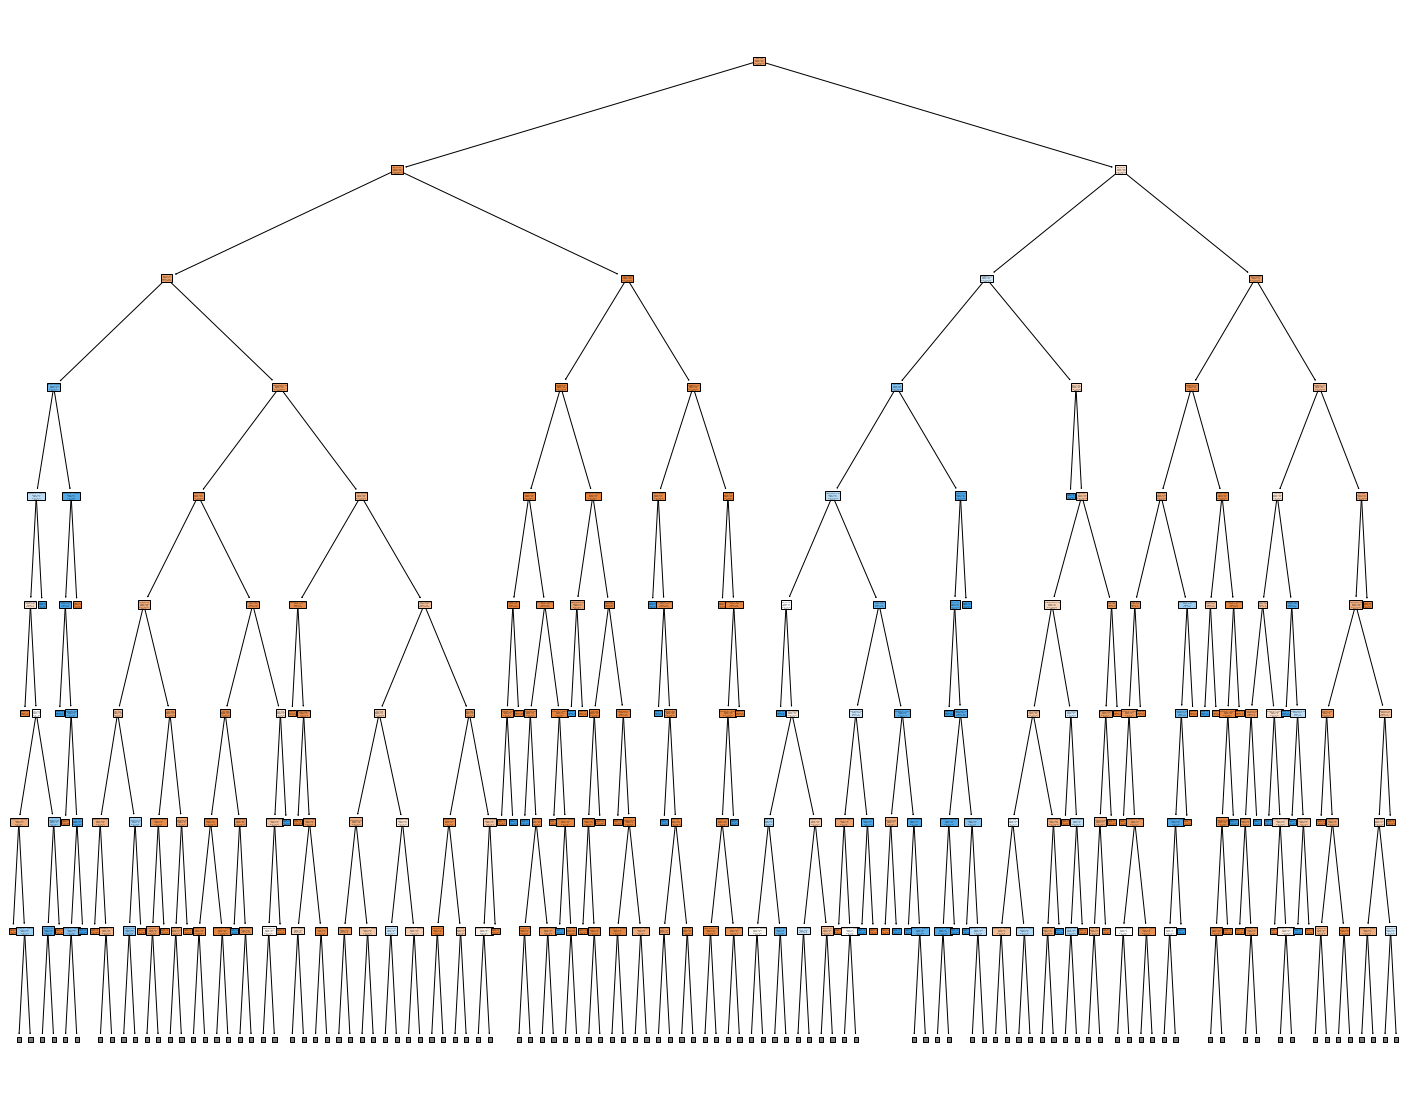

In [18]:

# first choice -- better online view with larger node and more readable information
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                                 feature_names=X_train.columns,  
#                                 class_names='Exited',
#                                 max_depth = 8,
#                                 filled=True)

# # Draw graph
# graph = graphviz.Source(dot_data, format="png") 
# graph




# second choice -- better entire view of the tree structure, but node information not readable

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X_train.columns,  
                   class_names='Exited',
                   max_depth = 8,
                   filled=True)


**1.8: Prune the tree and evaluate the performance**

In [19]:
## prune the tree with ccp_alph
from sklearn.model_selection import GridSearchCV
param_grid = {'ccp_alpha': np.linspace(0., 0.03, 20)}
clf_pruned = GridSearchCV(DecisionTreeClassifier(random_state=0),
                    param_grid=param_grid, cv=10)
clf_pruned.fit(X_train, y_train)

clf_pruend_tree = clf_pruned.best_estimator_
print(" Results from Grid Search on Cost Complex Pruning" )
print("\n The best estimator across ALL searched params:\n",clf_pruned.best_estimator_)
print("\n The best score across ALL searched params:\n",clf_pruned.best_score_)
print("\n The best parameters across ALL searched params:\n",clf_pruned.best_params_)


y_pred_train = clf_pruend_tree.predict(X_train)
precision_train = precision_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
f1_score_train = f1_score(y_train,y_pred_train)
print("Accuracy on development set(train):",metrics.accuracy_score(y_train, y_pred_train))
print('precision score on development set(train):', precision_train)
print('recall score on development set(train):', recall_train)
print('f1 score on development set(train):', f1_score_train, '\n')

y_pred_val = clf_pruned.predict(X_val)
precision_val = precision_score(y_val, y_pred_val)
recall_val = recall_score(y_val, y_pred_val)
f1_score_val = f1_score(y_val,y_pred_val)
print("Accuracy on development set(validation):",metrics.accuracy_score(y_val, y_pred_val))
print('precision score on development set(validation):', precision_val)
print('recall score on development set(validation):', recall_val)
print('f1 score on development set(validation):', f1_score_val, '\n')

y_pred_test = clf_pruned.predict(X_test)
precision_test =  precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_score_test = f1_score(y_test,y_pred_test)
print("Accuracy on test set:",metrics.accuracy_score(y_test, y_pred_test))
print('precision score on test set:', precision_test)
print('recall score on test set:', recall_test)
print('f1 score on test set:', f1_score_test)

 Results from Grid Search on Cost Complex Pruning

 The best estimator across ALL searched params:
 DecisionTreeClassifier(ccp_alpha=0.003157894736842105, random_state=0)

 The best score across ALL searched params:
 0.8554318149693871

 The best parameters across ALL searched params:
 {'ccp_alpha': 0.003157894736842105}
Accuracy on development set(train): 0.8563983786913724
precision score on development set(train): 0.7611202635914333
recall score on development set(train): 0.4354382657869934
f1 score on development set(train): 0.5539568345323741 

Accuracy on development set(validation): 0.834973943254198
precision score on development set(validation): 0.6830601092896175
recall score on development set(validation): 0.35511363636363635
f1 score on development set(validation): 0.4672897196261682 

Accuracy on test set: 0.8564814814814815
precision score on test set: 0.746031746031746
recall score on test set: 0.41348973607038125
f1 score on test set: 0.5320754716981132


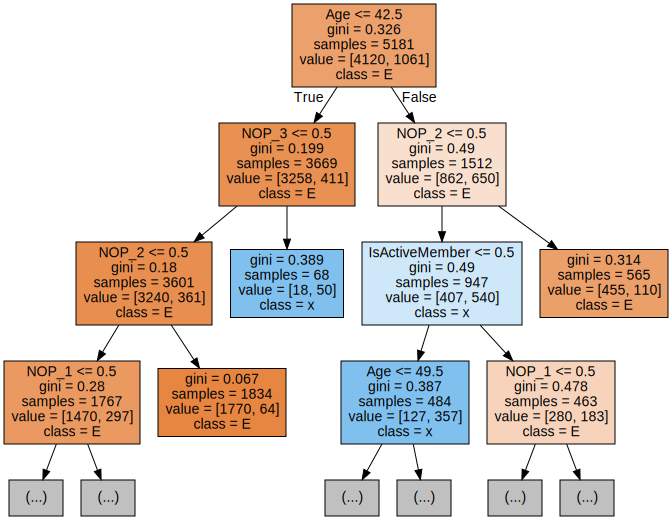

In [20]:
## visualize the tree with depth = 3
import graphviz
datagraph = tree.export_graphviz(clf_pruned.best_estimator_, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names='Exited',
                                max_depth = 3,
                                filled=True)

# Draw graph
graph = graphviz.Source(datagraph, format="png") 
graph


#### The best parameter using ccp is alpha = 0.003157894736842105. From the reported results, we see that the accuracy, precision and f1 score has improved while the recall score decreased by about 0.07. Overall, if we use f1 score to evaluate, ccp has increased our model performance on the test set.

**1.9: top 3 most important features for this trained tree.**

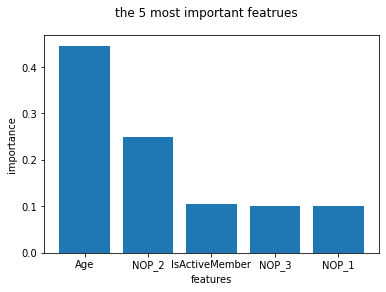

In [21]:
clf_pruned_tree = clf_pruned.best_estimator_
feat_importance = clf_pruned_tree.feature_importances_
feats = X_train.columns.values


df_feat = pd.DataFrame(
   dict(
      feats=feats,
      importance=feat_importance
   )
)

df_feat_sorted = df_feat.sort_values(by = 'importance',ascending = False)[:][:5]


plt.bar('feats', 'importance', data=df_feat_sorted)
plt.xlabel('features')
plt.ylabel('importance')
plt.suptitle('the 5 most important featrues')
plt.show()

### The three most important features are Age, NumOfProducts = 2, and isActiveMember. Feature importance is calculated by the "decrease in node impurity" weighted by "the probability of reaching that node". For Age, it is expected that it can split the dataset with high certainty into a majority subset along with a minority subset, and it is also highly possible that we reach the node (as we see from the visualization, it starts to appear at the first node). For NumOfProducts, if we plot it on a side by side barplot, we can see that most of the customers who didn't exit have 1 or 2 product. So again we expect it to split the dataset with high certainty into a majority subset and a minority subset. For IsActiveMember, as we see from the side by side barplot on in question 1.3, it does not split "exited" and "didn't exit" as much as NumOfProducts does, but it appears on half of the 3rd-layer nodes of the (pruned) tree. So it is more likely to reach the nodes with IsActiveMember than nodes with other features that are on deeper layers. It's also intuitive to take a look at a customer's activeness when understanding whether they exited or not. Therefore, the three appears to be the most important features in our tree. 

## Part 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. . Evaluate the performance of the model on test dataset. Compare with Decision Tree ?**

In [28]:
start_time = time.time()
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train,y_train)


y_pred_test_rf = clf_rf.predict(X_test)
precision_test_rf =  precision_score(y_test, y_pred_test_rf)
recall_test_rf = recall_score(y_test, y_pred_test_rf)
f1_score_test_rf = f1_score(y_test,y_pred_test_rf)
print("Accuracy on test set:",metrics.accuracy_score(y_test, y_pred_test_rf))
print('precision score on test set:', precision_test_rf)
print('recall score on test set:', recall_test_rf)
print('f1 score on test set:', f1_score_test_rf)

print("--- %s seconds ---" % (time.time() - start_time))


Accuracy on test set: 0.8582175925925926
precision score on test set: 0.74
recall score on test set: 0.4340175953079179
f1 score on test set: 0.5471349353049907
--- 0.5049569606781006 seconds ---


### Except that the random forest has slightly lower recall score than the decision tree. It has better accuracy, precision, and f1 score than the decision tree. The random forest has better performance on the test dataset. 

**2.2: Check if all trees in the trained random forest model have pure leaves.**

In [23]:
tree_count = len(clf_rf.estimators_)
pure_tree_count = 0

for t in clf_rf.estimators_:
    n_nodes = t.tree_.node_count

    children_left = t.tree_.children_left
    children_right = t.tree_.children_right
    threshold = t.tree_.threshold

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, 0)]
    while len(stack) > 0:
        # `pop` ensures each node is only visited once
        node_id, depth = stack.pop()
        node_depth[node_id] = depth

        # determine if the node is a split node
        is_split_node = children_left[node_id] != children_right[node_id]
        
        #loop through the children of a split node
        if is_split_node:
            stack.append((children_left[node_id], depth + 1))
            stack.append((children_right[node_id], depth + 1))
        ## if not, this is a leaf node, which is what we care about
        else:
            is_leaves[node_id] = True


    sum_impurity_tree = 0
    n_leaf = 0
    for i in range(n_nodes):
        if is_leaves[i]:
            n_leaf +=1
            ## sum all the impurity number of the leaf nodes, if all leaf nodes are pure (impurity = 0), the sum
            ## would be 0
            sum_impurity_tree += t.tree_.impurity[i] 
    if sum_impurity_tree == 0:
        pure_tree_count +=1
        
print('There are', pure_tree_count, 'trees with pure leaf nodes out of', tree_count, 'trees in the Randome Forest' )


There are 100 trees with pure leaf nodes out of 100 trees in the Randome Forest


####  To check if every tree has pure leaf nodes, we traverse all the leaf nodes in each tree in the Random forest. For each tree, first we set the sum of impurity of its leaf nodes to 0, and we visit each leaf node, then add its impurity to this sum. If there all the leaf nodes are pure, the sum of inpurity would finally be updated to 0. Therefore, this tree is marked as "having pure leaf nodes". In total, we see that 100 of 100 trees in the Randome Forest have at least one pure node. 

**2.3 Which hyperparameters we want to choose to pune?**

##### 1. n_estimators bacause in a Random Forest model, one of the most important settings is the number of trees in the forest; We generally expect more trees to improve the performance of the forest, but we have to keep in mind that the time and space needed to train the model. 
##### 2. Decision tree parameters (max depth). Because max depth is easy to track and is also one of the most effective pruning method to prevent overfitting. 


**2.4: Discuss 5 different values for these two hyperparameters to generate potential performance lift**

#### For n_estimators, choose two value less than 100 and three values more than 100. Since the default is to have 100 trees in the Random Forest, we would also like to see if less or more trees gives better performance. Possible choices would be to choose 50, 80, then 150, 200, and 300 estimators. (We generally expect more estimators to capture more effects of features, but don't want to waste spaces and complexity. So 50 and 80 estimators will give us a sense of whether the Random Forest on our dataset can actually reach a good enough performance with small number of trees.) 
#### For max_depth, choose two values less than 8 and two values between 8 and 26, and one value larger than 26. Since back in our pruned decision tree, we have a max_depth = 8 and it in general overperforms the default decision tree (with max_depth = 26) on our dataset. So we expect a better performance with smaller max_depth, and want to have two trials with max_depth even smaller than 8. But we still want to see if there is other "optimal choices" between 8 and 23, so we have another two trials with max_depth like 13 and 19. We want to have one more trial with max_depth larger than 23 just in case that we accidentally concluded that smaller max_depth worked better in our case, so choose one more max_depth like 30. 


**2.5: Perform model selection using the chosen values for the hyperparameters. Use cross-validation for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model.**

In [29]:
# automatic nested cross-validation for random forest on a classification dataset
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import cross_validate
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.ensemble import RandomForestClassifier


# define the model
clf_rf = RandomForestClassifier(random_state = 1)
# clf_rf.fit(X_train,y_train)

# define search space
space = dict()
space['n_estimators'] = [50,80,150,200,300]
space['max_depth'] = [3,5,13,19,30]

# define random search, evaluating by f1 score
rf_random_cv = RandomizedSearchCV(clf_rf, space, scoring='f1', n_jobs=1, n_iter=15, cv=5, refit=True) # cross validation is set to 5

# report the model
result_RandomForest = rf_random_cv.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator(tree) across ALL searched params:\n", result_RandomForest.best_estimator_)
print("\n The best score across ALL searched params:\n", rf_random_cv.best_score_)
print("\n The best parameters across ALL searched params:\n", rf_random_cv.best_params_)


 Results from Random Search 

 The best estimator(tree) across ALL searched params:
 RandomForestClassifier(max_depth=19, n_estimators=200, random_state=1)

 The best score across ALL searched params:
 0.593750609293131

 The best parameters across ALL searched params:
 {'n_estimators': 200, 'max_depth': 19}


In [30]:
clf_rf_tuned = result_RandomForest.best_estimator_
clf_rf_tuned.fit(X_train,y_train)


y_pred_test_rf_tuned = clf_rf_tuned.predict(X_test)
precision_test_rf_tuned =  precision_score(y_test, y_pred_test_rf_tuned)
recall_test_rf_tuned = recall_score(y_test, y_pred_test_rf_tuned)
f1_score_test_rf_tuned = f1_score(y_test,y_pred_test_rf_tuned)
print("Accuracy on test set:",metrics.accuracy_score(y_test, y_pred_test_rf_tuned))
print('precision score on test set:', precision_test_rf_tuned)
print('recall score on test set:', recall_test_rf_tuned)
print('f1 score on test set:', f1_score_test_rf_tuned)

Accuracy on test set: 0.8605324074074074
precision score on test set: 0.7525252525252525
recall score on test set: 0.436950146627566
f1 score on test set: 0.5528756957328386


#### With the model selected using cross-validation for finding the optimal hyperparameters. The optimal hyperparameters are {'n_estimators': 150, 'max_depth': 30}. The performance of the optimal model on test dataset improved over our previous plain-vanilla random forest model trained in Q2.1 for accuracy, precision, and f1 score. 

**2.6: top 3 most important features from the model trained.**

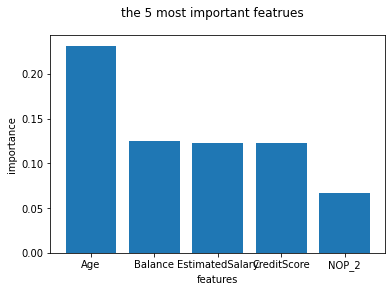

In [31]:
feat_importance = clf_rf_tuned.feature_importances_
feats = X_train.columns.values


df_feat = pd.DataFrame(
   dict(
      feats=feats,
      importance=feat_importance
   )
)
df_feat_sorted = df_feat.sort_values(by = 'importance',ascending = False)[:][:5]


plt.bar('feats', 'importance', data=df_feat_sorted)
plt.xlabel('features')
plt.ylabel('importance')
plt.suptitle('the 5 most important featrues')
plt.show()



### With random forest, the three most important features are Age, Balance, and CreditScore, which differs from the important features in 1.9, which are Age, NumOfProducts, and isActiveMember. Balance and CreditScore both give insights of financial status of a customer and their interaction with the bank, therefore, it is understandable that they can be strong indicators when separating the dataset at a node. I would expect both set to be reasonable since the activeness of a bank customer and the number of products they have are also intuitively linked to their state of exit or not.

## Part 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune GradientBoostingClassifier and HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. Report on the time taken to do model selection for both the models.  Report the performance of the test dataset from the optimal models.**

In [32]:
start_time = time.time()

gb_clf = GradientBoostingClassifier()

space = dict()
# min_samples_leaf
# max_depth
# learning_rate
space['min_samples_leaf'] = [1,2,4,6,8]
space['learning_rate'] = [0.01,0.1,0.5,1,5]
space['max_depth'] = [1,3,5,7,9]

# define random search, evaluating by f1 score
gb_clf_cv = RandomizedSearchCV(gb_clf, space, scoring='f1', n_jobs=1, n_iter=15, cv=5, refit=True)

# report the model
result_GradientBoosting = gb_clf_cv.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator(tree) across ALL searched params:\n", result_GradientBoosting.best_estimator_)
print("\n The best score across ALL searched params:\n", gb_clf_cv.best_score_)
print("\n The best parameters across ALL searched params:\n", gb_clf_cv.best_params_)

print("--- %s seconds ---" % (time.time() - start_time))


 Results from Random Search 

 The best estimator(tree) across ALL searched params:
 GradientBoostingClassifier(max_depth=5, min_samples_leaf=4)

 The best score across ALL searched params:
 0.6080470540362268

 The best parameters across ALL searched params:
 {'min_samples_leaf': 4, 'max_depth': 5, 'learning_rate': 0.1}
--- 70.02164030075073 seconds ---


In [34]:
start_time = time.time()


# define the model
hist_clf = HistGradientBoostingClassifier()

# define search space
space = dict()
# min_samples_leaf
# max_depth
# learning rate
space['min_samples_leaf'] = [1,2,4,6,8]
space['learning_rate'] = [0.01,0.1,0.5,1,5]
space['max_depth'] = [1,3,5,7,9]

# define random search, evaluating by f1 score
hist_clf_cv = RandomizedSearchCV(hist_clf, space, scoring='f1', n_jobs=1, n_iter=15, cv=5, refit=True)

# report the model
result_HistGradientBoosting = hist_clf_cv.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator(tree) across ALL searched params:\n", result_HistGradientBoosting.best_estimator_)
print("\n The best score across ALL searched params:\n", hist_clf_cv.best_score_)
print("\n The best parameters across ALL searched params:\n", hist_clf_cv.best_params_)

print("--- %s seconds ---" % (time.time() - start_time))


 Results from Random Search 

 The best estimator(tree) across ALL searched params:
 HistGradientBoostingClassifier(max_depth=7, min_samples_leaf=8)

 The best score across ALL searched params:
 0.6136793334882491

 The best parameters across ALL searched params:
 {'min_samples_leaf': 8, 'max_depth': 7, 'learning_rate': 0.1}
--- 107.38208889961243 seconds ---


In [33]:
gb_clf_tuned = result_GradientBoosting.best_estimator_
gb_clf_tuned.fit(X_train,y_train)


y_pred_test_gb_clf_tuned = gb_clf_tuned.predict(X_test)
precision_test_gb_clf_tuned =  precision_score(y_test, y_pred_test_gb_clf_tuned)
recall_test_gb_clf_tuned = recall_score(y_test, y_pred_test_gb_clf_tuned)
f1_score_test_gb_clf_tuned = f1_score(y_test,y_pred_test_gb_clf_tuned)
print("Accuracy on test set:",metrics.accuracy_score(y_test, y_pred_test_gb_clf_tuned))
print('precision score on test set:', precision_test_gb_clf_tuned)
print('recall score on test set:', recall_test_gb_clf_tuned)
print('f1 score on test set:', f1_score_test_gb_clf_tuned)

Accuracy on test set: 0.8553240740740741
precision score on test set: 0.6986899563318777
recall score on test set: 0.46920821114369504
f1 score on test set: 0.5614035087719299


In [35]:
hist_clf_tuned = result_HistGradientBoosting.best_estimator_
hist_clf_tuned.fit(X_train,y_train)


y_pred_test_hist_clf_tuned = hist_clf_tuned.predict(X_test)
precision_test_hist_clf_tuned =  precision_score(y_test, y_pred_test_hist_clf_tuned)
recall_test_hist_clf_tuned = recall_score(y_test, y_pred_test_hist_clf_tuned)
f1_score_test_hist_clf_tuned = f1_score(y_test,y_pred_test_hist_clf_tuned)
print("hist: Accuracy on test set:",metrics.accuracy_score(y_test, y_pred_test_hist_clf_tuned))
print('precision score on test set:', precision_test_hist_clf_tuned)
print('recall score on test set:', recall_test_hist_clf_tuned)
print('f1 score on test set:', f1_score_test_hist_clf_tuned)

hist: Accuracy on test set: 0.8570601851851852
precision score on test set: 0.7025862068965517
recall score on test set: 0.4780058651026393
f1 score on test set: 0.568935427574171


#### The three hyperparameters we chose are min_sample_leaf, max_depth, and learning_rate. The time taken to do model selection for GradientBoostingClassifier was about 70 secs and for HistGradientBoostingClassifier was about 107 secs. The performance on test datasets showed that the GradientBoostingClassifier outperforms HistGradientBoostingClassifier on recall socre, and the latter outperforms the former on accuracy precision, and f1. The two models had very similar performance evaluated by the metrics we selected. HistGradientBoosting used longer time to train but gain more performance overall. 

**3.2: Train an XGBoost model by tuning 3 hyperparameters using 10 fold cross-validation. Compare the performance of the trained XGBoost model with HistGradientBoostingClassifier and GradientBoostingClassifier**

In [41]:
start_time = time.time()## YOUR CODE HERE
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBClassifier

# define the model
xgb_clf = XGBClassifier()

# define search space
space = dict()
# min_child_weight
# max_depth
# gamma
space['gamma'] = [i/10.0 for i in range(0,5)]
space['min_child_weight'] = [1,2,4,6,8]
space['max_depth'] = [1,3,5,7,9]


# define random search, evaluating by f1 score
xgb_clf_cv = RandomizedSearchCV(xgb_clf, space, scoring='f1', n_jobs=1, n_iter=15, cv=10, refit=True)

# report the model
result_XGBClassifier = xgb_clf_cv.fit(X_train, y_train)

print(" Results from Random Search " )
print("\n The best estimator(tree) across ALL searched params:\n", result_XGBClassifier.best_estimator_)
print("\n The best score across ALL searched params:\n", xgb_clf_cv.best_score_)
print("\n The best parameters across ALL searched params:\n", xgb_clf_cv.best_params_)

print("--- %s seconds ---" % (time.time() - start_time))

 Results from Random Search 

 The best estimator(tree) across ALL searched params:
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.2, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

 The best score across ALL searched params:
 0.6146650796333539

 The best parameters across ALL searched params:
 {'min_child_weight': 1, 'max_depth': 3, 'gamma': 0.2}
--- 50.84033703804016 seconds ---


In [42]:
xgb_clf_tuned = result_XGBClassifier.best_estimator_
xgb_clf_tuned.fit(X_train,y_train)


y_pred_test_xgb_clf_tuned = xgb_clf_tuned.predict(X_test)
precision_test_xgb_clf_tuned =  precision_score(y_test, y_pred_test_xgb_clf_tuned)
recall_test_xgb_clf_tuned = recall_score(y_test, y_pred_test_xgb_clf_tuned)
f1_score_test_xgb_clf_tuned = f1_score(y_test,y_pred_test_xgb_clf_tuned)
print("Accuracy on test set:",metrics.accuracy_score(y_test, y_pred_test_xgb_clf_tuned))
print('precision score on test set:', precision_test_xgb_clf_tuned)
print('recall score on test set:', recall_test_xgb_clf_tuned)
print('f1 score on test set:', f1_score_test_xgb_clf_tuned)

Accuracy on test set: 0.8611111111111112
precision score on test set: 0.7224669603524229
recall score on test set: 0.4809384164222874
f1 score on test set: 0.5774647887323944


#### The three hyperparameters we chose are min_child_weight, max_depth, and gamma. The best hyperparameters are  {'min_child_weight': 1, 'max_depth': 3, 'gamma': 0.2}. The time taken to do model selection for XGBClassifier was about 51 secs, which was faster than HistGradientBoostingClassifier and slower than GradientBoostingClassifier. The performance on test datasets (measured by f1 score) showed that the XGBClassifier, HistGradientBoostingClassifier and GradientBoostingClassifier have very similar performance on accuracy, precision, and recall score, with XGBClassifier performs slightly better. 

**3.3: Compare the results on the test dataset from XGBoost, HistGradientBoostingClassifier, GradientBoostingClassifier with previous results**

#### Evaluating mostly by f1 score, we see that the XGBClassifier performs the best, and it also has the highest accuracy and precision score. The DecisionTreeClassifier performs the worst, with lowest accuracy and f1 score. The difference between HistGradient and DecisionTree f1 score is about 0.08 (0.56-0.48). If we don't consider running time, I would choose the XGBClassifier based on the discussion above. Yet we still need to keep in mind that it is prabably very time consuming (76secs). Comparing with RandomForest, which also has a decent f1 score of about 0.54, but only using 0.5 secs to train, the XGBClassifier might not be the most efficient. Therefore, I would recommend using RandomForest. 


**3.4: top 3 features from the trained XGBoost model**

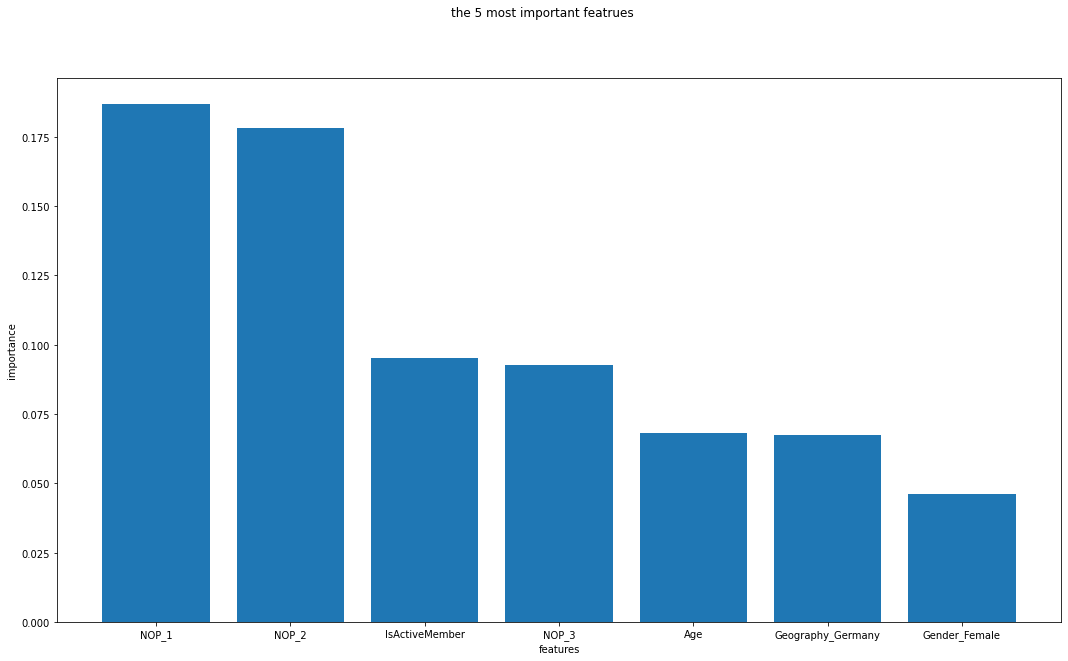

In [43]:
feat_importance = xgb_clf_tuned.feature_importances_
feats = X_train.columns.values

df_feat = pd.DataFrame(
   dict(
      feats=feats,
      importance=feat_importance
   )
)
df_feat_sorted = df_feat.sort_values(by = 'importance',ascending = False)[:][:7]

plt.figure(figsize=(18,10))
plt.bar('feats', 'importance', data=df_feat_sorted)
plt.xlabel('features')
plt.ylabel('importance')
plt.suptitle('the 5 most important featrues')
plt.show()


#### The XGBClassifier gives three most important features as NumOfProduct = 1 = 2, and IsActiveMember. Which is differnt from that given by DecisionTreeClassifier (Age, IsActiveMember, and NumOfProducts) and that given by RandomForest, which are Age, EstimatedSalary, and CreditScore. In this case, I would not trust the XGBClassifier the most, since intuitively although number of products may explain to some degree if a customer stays or exit, it may not have the most strong dividing power to split the data at a node. I would trust the featrues given by RandomForest among these three models the most, because these features make more sense and the random forest also has a relatively high performance (f1 score) 

**3.5: use top 7 features (as given by feature importances from XGBoost) and repeat training**

In [44]:
## YOUR CODE HERE
X_train_7 = X_train[['NOP_2','NOP_3','NOP_1','IsActiveMember','Age','Geography_Germany','Gender_Female']]
X_test_7 = X_test[['NOP_2','NOP_3','NOP_1','IsActiveMember','Age','Geography_Germany','Gender_Female']]
## train xgb only on these columns 
start_time = time.time()## YOUR CODE HERE
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBClassifier

# define the model
xgb_clf = XGBClassifier()
# clf_rf.fit(X_train,y_train)

# define search space
space = dict()
# min_samples_leaf
# max_depth
# learning rate
space['gamma'] = [i/10.0 for i in range(0,5)]
space['min_child_weight'] = [1,2,4,6,8]
space['max_depth'] = [1,3,5,7,9]
# 'max_depth':[4,5,6],
# define random search, evaluating by f1 score
xgb_clf_cv = RandomizedSearchCV(xgb_clf, space, scoring='f1', n_jobs=1, n_iter=15, cv=10, refit=True)

# report the model
result_XGBClassifier_7 = xgb_clf_cv.fit(X_train_7, y_train)

print(" Results from Random Search " )
print("\n The best estimator(tree) across ALL searched params:\n", result_XGBClassifier_7.best_estimator_)
print("\n The best score across ALL searched params:\n", xgb_clf_cv.best_score_)
print("\n The best parameters across ALL searched params:\n", xgb_clf_cv.best_params_)

print("--- %s seconds ---" % (time.time() - start_time))


xgb_clf_tuned_7 = result_XGBClassifier_7.best_estimator_
xgb_clf_tuned_7.fit(X_train_7,y_train)


y_pred_test_xgb_clf_tuned_7 = xgb_clf_tuned_7.predict(X_test_7)
precision_test_xgb_clf_tuned_7 =  precision_score(y_test, y_pred_test_xgb_clf_tuned_7)
recall_test_xgb_clf_tuned_7 = recall_score(y_test, y_pred_test_xgb_clf_tuned_7)
f1_score_test_xgb_clf_tuned_7 = f1_score(y_test,y_pred_test_xgb_clf_tuned_7)
print("Accuracy on test set:",metrics.accuracy_score(y_test, y_pred_test_xgb_clf_tuned_7))
print('precision score on test set:', precision_test_xgb_clf_tuned_7)
print('recall score on test set:', recall_test_xgb_clf_tuned_7)
print('f1 score on test set:', f1_score_test_xgb_clf_tuned_7)


 Results from Random Search 

 The best estimator(tree) across ALL searched params:
 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0.3, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=6,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

 The best score across ALL searched params:
 0.5900077745414517

 The best parameters across ALL searched params:
 {'min_child_weight': 6, 'max_depth': 3, 'gamma': 0.3}
--- 25.441941022872925 seconds ---
Accuracy 

#### From the stats reported above, this time we have shorter training time than with the entire data set. The accuracy and precision improves, recall and f1 score decreases. If we use accuracy to evaluate, using the only 7 most important features is a better choice than using the entire featrue sets. The reason might be that by eliminating not important features, we allow important features to participate more in the model prediction and split, thus excluding some noises in the original dataset, which might preventing the model from making better decisions.

## Question 4: Calibration

**4.1: Estimate the brier score for the XGBoost model (trained with optimal hyperparameters)**

In [45]:
from sklearn.metrics import brier_score_loss
BS = brier_score_loss(y_test,y_pred_test_xgb_clf_tuned)
BS

0.1388888888888889

**4.2: Calibrate the trained XGBoost model using isotonic regression as well as Platt scaling. Plot predicted v.s. actual on test datasets from both the calibration methods**

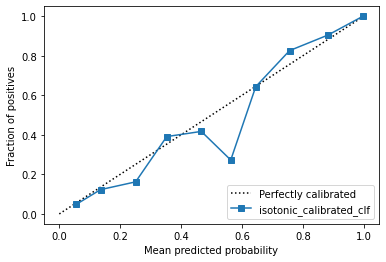

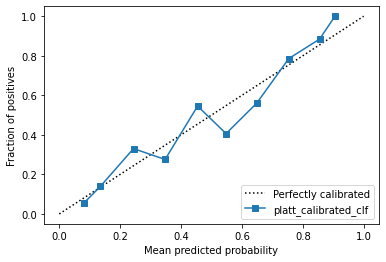

In [48]:
## YOUR CODE HERE
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import CalibrationDisplay
iso_cal_clf = CalibratedClassifierCV(xgb_clf_tuned, cv = 'prefit',method = 'isotonic')
iso_cal_clf.fit(X_val, y_val)
display = CalibrationDisplay.from_estimator(iso_cal_clf,X_test,y_test, n_bins = 10, name = 'isotonic_calibrated_clf')

platt_cal_clf = CalibratedClassifierCV(xgb_clf_tuned, cv = 'prefit',method = 'sigmoid')
platt_cal_clf.fit(X_val, y_val)
display = CalibrationDisplay.from_estimator(platt_cal_clf,X_test,y_test, n_bins = 10, name = 'platt_calibrated_clf')

**4.3: Report brier scores from both the calibration methods.**

In [49]:
## for isotonic

y_pred_test_iso_cal_clf= iso_cal_clf.predict_proba(X_test)[:,1]
BS_iso = brier_score_loss(y_test,y_pred_test_iso_cal_clf)
print(BS_iso)



## for platt
y_pred_test_platt_cal_clf= platt_cal_clf.predict_proba(X_test)[:,1]
BS_platt = brier_score_loss(y_test,y_pred_test_platt_cal_clf)
print(BS_platt)

0.10382879671314986
0.10432741342614801


#### from the results we see that the isotonic calibration increased brier score of the XGBClassifier from about 0.139 to 0.104. The platt calibration increased the brier score to about 0.104